# Project 7

- [Report](https://docs.google.com/document/d/1d6JuigRGQrC9244Y_fzWR2EBKznfnKVnQH_Bf-OEOwI/edit?usp=sharing)
- [Slides](https://docs.google.com/presentation/d/1qbXJJV9wEzjcOUMc-ESLRDamedZsxWrcTiVqrR-AlJ8/edit?usp=sharing)
- [Dataset](https://www.kaggle.com/datasets/jonathanpilafas/2024-march-madness-statistical-analysis)

## Setup

In [342]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import re
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
from sklearn import svm

## Exploring/Cleaning Data

In [343]:
df = pd.read_csv('DEV _ March Madness.csv')
exclude_columns = [col for col in df.columns if 'Rank' in col]
df = df.drop(columns=exclude_columns)

In [344]:
df = df[['Team Name', 'Off.eFG %', 'Off.TO %', 'Off.OR %', 'Off.FT Rate', 'Def.eFG %', 'Def.TO %', 'Def.OR %', 'Def.FT Rate', 'Off.FT',
       'Off.2PT FG', 'Off.3PT FG', 'Def.FT', 'Def.2PT FG', 'Def.3PT FG', 'Avg Possession Length (Offense)', 
       'Avg Possession Length (Defense)', 'Active Coaching Length', 'Post-Season Tournament']]

def extract_years(years_string):
    years = re.findall(r'\d+', years_string)
    if years:
        return int(years[0])
    else:
        return None

df['Active Coaching Length'] = df['Active Coaching Length'].apply(extract_years)
df

,Team Name,Off.eFG %,Off.TO %,Off.OR %,Off.FT Rate,Def.eFG %,Def.TO %,Def.OR %,Def.FT Rate,Off.FT,Off.2PT FG,Off.3PT FG,Def.FT,Def.2PT FG,Def.3PT FG,Avg Possession Length (Offense),Avg Possession Length (Defense),Active Coaching Length,Post-Season Tournament
0,UConn,57.096289,14.876492,36.472761,33.299900,45.096004,16.164308,26.784282,32.485729,17.797834,49.819495,32.382671,20.639269,51.415525,27.945205,18.5,17.4,5,March Madness
1,Houston,49.733656,13.744375,36.875496,29.927361,44.018857,24.667057,30.282293,38.951090,17.277487,51.067257,31.655256,22.870418,44.914817,32.214765,18.8,18.3,9,March Madness
2,Purdue,55.967826,16.465733,37.371855,42.812662,47.723971,13.989356,24.737268,23.002421,21.620640,48.401163,29.978198,14.859611,53.909287,31.231102,17.8,17.2,18,March Madness
3,Auburn,54.085700,14.896782,33.333333,38.266069,43.638743,18.321330,30.407023,41.151832,20.968329,49.872588,29.159083,25.779163,48.174533,26.046305,16.3,17.7,9,March Madness
4,Iowa State,51.907631,15.661234,31.615120,36.094378,47.082380,25.713762,29.427549,35.183066,19.501752,54.573764,25.924484,21.017274,43.282150,35.700576,17.2,18.0,2,March Madness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Stonehill,46.662831,19.520247,22.506862,22.612198,52.718287,16.745310,31.086142,29.434377,14.451477,46.624473,38.924051,17.098446,43.782383,39.119171,18.0,16.4,10,Not In a Post-Season Tournament
358,Pacific,46.415553,16.836970,18.719690,37.120292,56.335616,16.119485,33.224756,36.415525,20.540822,50.130005,29.329173,19.131503,50.389185,30.479312,17.6,17.2,2,Not In a Post-Season Tournament
359,IUPUI,46.495620,21.344583,29.905561,33.229036,58.203593,18.481898,35.421412,33.413174,20.534759,64.064171,15.401070,17.417162,52.251487,30.331351,17.8,17.3,2,Not In a Post-Season Tournament
360,Coppin State,42.106938,22.956835,27.029608,31.126671,51.301922,21.839467,38.605619,38.313701,21.156138,51.489869,27.353993,21.638258,48.674242,29.687500,17.5,17.6,0,Not In a Post-Season Tournament


<Axes: title={'center': 'Average Coaching Time of Current Coach'}, xlabel='Years'>

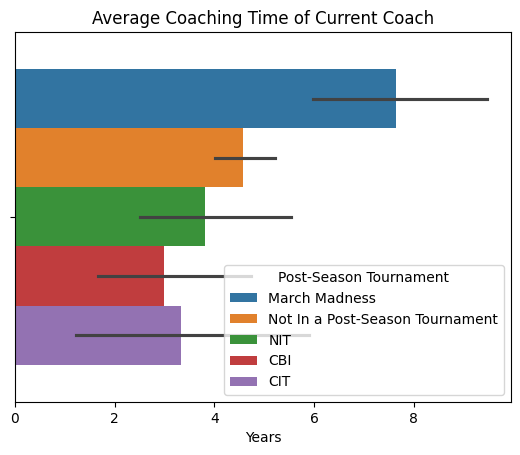

In [381]:
plt.title('Average Coaching Time of Current Coach')
plt.xlabel('Years')
sns.barplot(data=df, x="Active Coaching Length", hue='Post-Season Tournament')

Text(0, 0.5, 'Defensive field goal efficiency percentage')

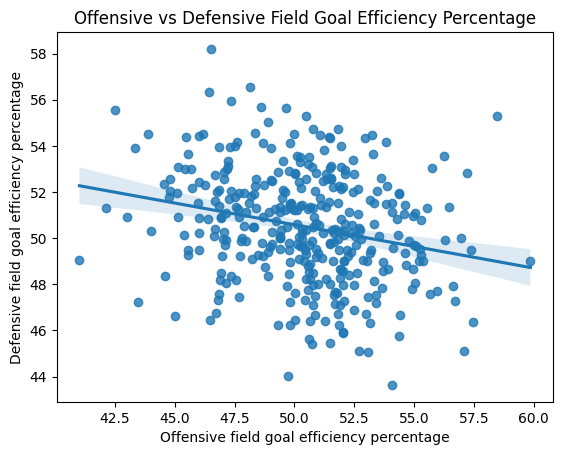

In [384]:
sns.regplot(data=df, x='Off.eFG %', y='Def.eFG %')
plt.title('Offensive vs Defensive Field Goal Efficiency Percentage')
plt.xlabel('Offensive field goal efficiency percentage')
plt.ylabel('Defensive field goal efficiency percentage')

Text(0, 0.5, 'Defensive field goal efficiency percentage')

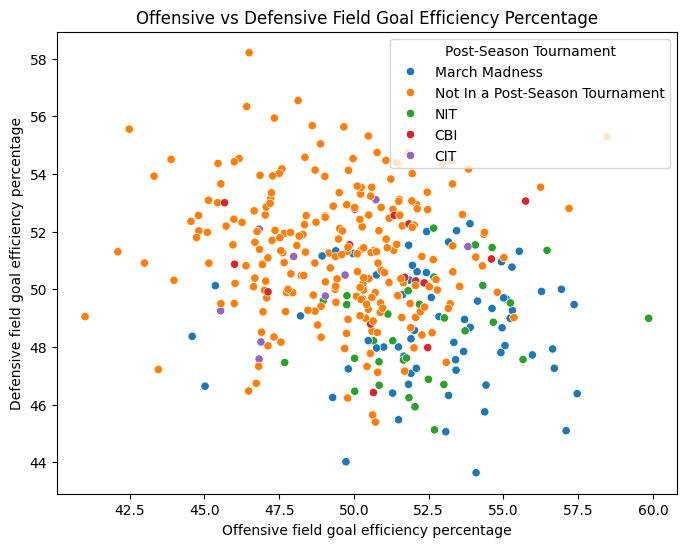

In [386]:
plt.figure(figsize=[8, 6])
sns.scatterplot(data=df, x='Off.eFG %', y='Def.eFG %', hue='Post-Season Tournament')
plt.title('Offensive vs Defensive Field Goal Efficiency Percentage')
plt.xlabel('Offensive field goal efficiency percentage')
plt.ylabel('Defensive field goal efficiency percentage')

Text(0, 0.5, 'Defensive turnover percentage')

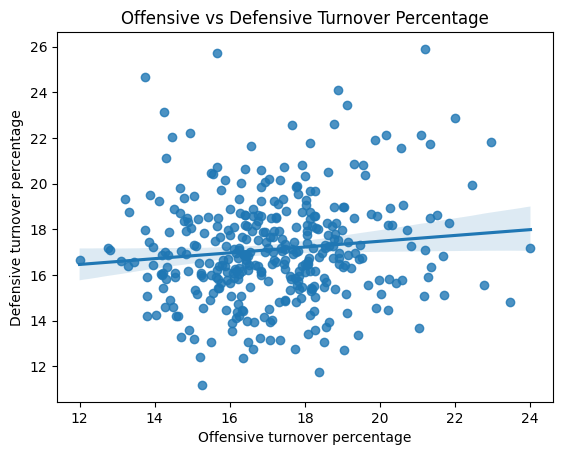

In [387]:
sns.regplot(data=df, x='Off.TO %', y='Def.TO %')
plt.title('Offensive vs Defensive Turnover Percentage')
plt.xlabel('Offensive turnover percentage')
plt.ylabel('Defensive turnover percentage')

Text(0, 0.5, 'Defensive rebound percentage')

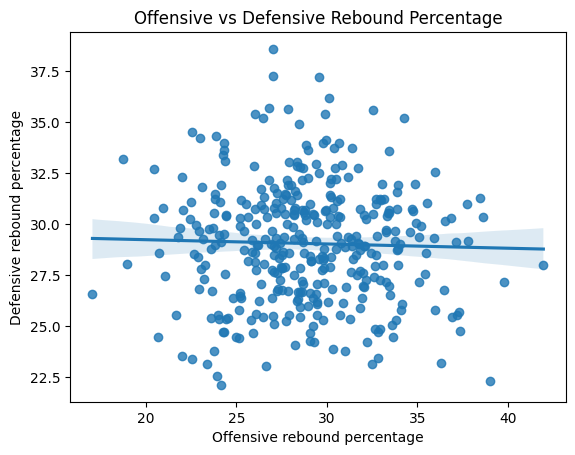

In [389]:
sns.regplot(data=df, x='Off.OR %', y='Def.OR %')
plt.title('Offensive vs Defensive Rebound Percentage')
plt.xlabel('Offensive rebound percentage')
plt.ylabel('Defensive rebound percentage')

Text(0, 0.5, 'Defensive free throw rate')

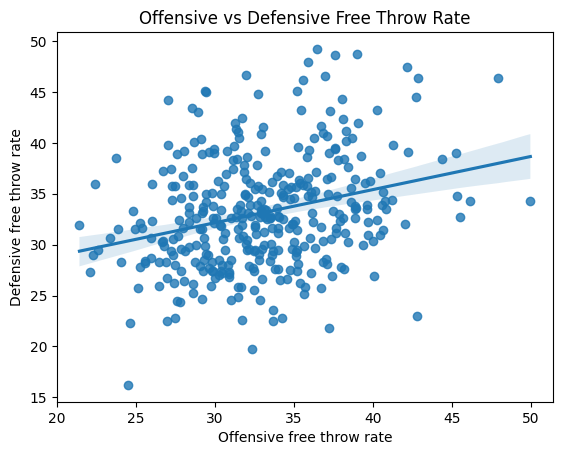

In [390]:
sns.regplot(data=df, x='Off.FT Rate', y='Def.FT Rate')
plt.title('Offensive vs Defensive Free Throw Rate')
plt.xlabel('Offensive free throw rate')
plt.ylabel('Defensive free throw rate')

Text(0, 0.5, 'Defensive free throws')

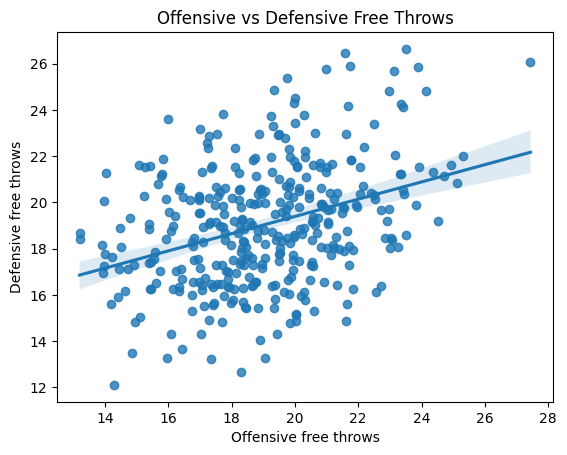

In [391]:
sns.regplot(data=df, x='Off.FT', y='Def.FT')
plt.title('Offensive vs Defensive Free Throws')
plt.xlabel('Offensive free throws')
plt.ylabel('Defensive free throws')

Text(0, 0.5, 'Defensive 2 pt field goals')

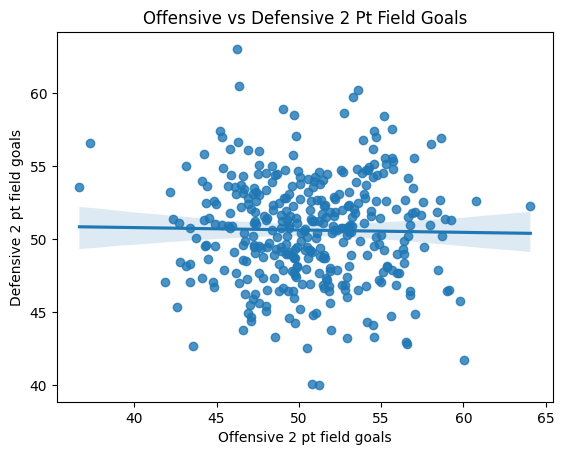

In [392]:
sns.regplot(data=df, x='Off.2PT FG', y='Def.2PT FG')
plt.title('Offensive vs Defensive 2 Pt Field Goals')
plt.xlabel('Offensive 2 pt field goals')
plt.ylabel('Defensive 2 pt field goals')

Text(0, 0.5, 'Defensive 3 pt field goals')

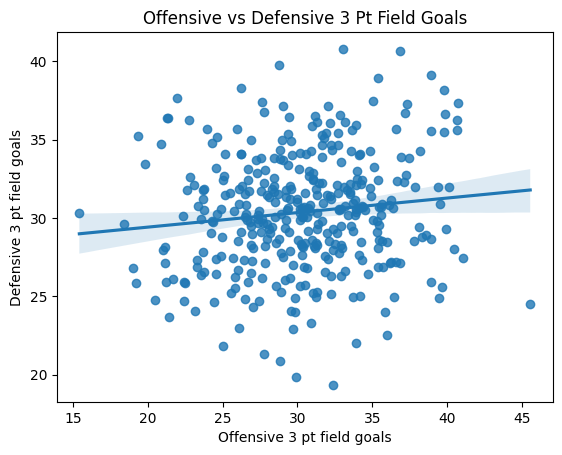

In [394]:
sns.regplot(data=df, x='Off.3PT FG', y='Def.3PT FG')
plt.title('Offensive vs Defensive 3 Pt Field Goals')
plt.xlabel('Offensive 3 pt field goals')
plt.ylabel('Defensive 3 pt field goals')

Text(0, 0.5, 'Defensive average possession length')

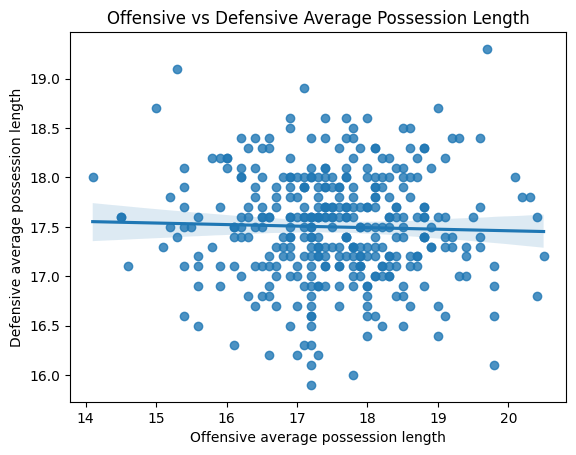

In [395]:
sns.regplot(data=df, x='Avg Possession Length (Offense)', y='Avg Possession Length (Defense)')
plt.title('Offensive vs Defensive Average Possession Length')
plt.xlabel('Offensive average possession length')
plt.ylabel('Defensive average possession length')

Text(0, 0.5, 'Teams Qualified')

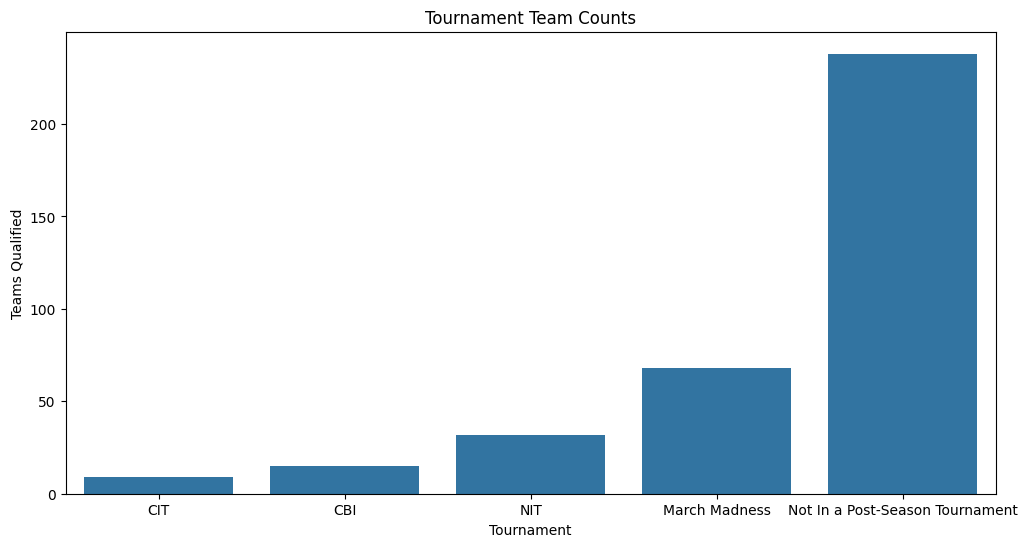

In [396]:
# 'March Madness', 'Not In a Post-Season Tournament', 'NIT', 'CBI', 'CIT'
byTourneyDF = df.groupby('Post-Season Tournament')['Team Name'].count().reset_index().sort_values('Team Name')

plt.figure(figsize=(12, 6))
sns.barplot(data=byTourneyDF, x='Post-Season Tournament', y='Team Name')
plt.title('Tournament Team Counts')
plt.xlabel('Tournament')
plt.ylabel('Teams Qualified')

## Logistic Regression

### All Classes

#### All Attributes

In [398]:
X = df[['Off.eFG %', 'Off.TO %', 'Off.OR %', 'Off.FT Rate',
       'Def.eFG %', 'Def.TO %', 'Def.OR %', 'Def.FT Rate', 'Off.FT',
       'Off.2PT FG', 'Off.3PT FG', 'Def.FT', 'Def.2PT FG', 'Def.3PT FG', 'Avg Possession Length (Offense)', 'Avg Possession Length (Defense)', 'Active Coaching Length']]
y = df['Post-Season Tournament']

class_counts = df['Post-Season Tournament'].value_counts()
display(class_counts.index)

total_samples = len(df)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=df['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index] 

lm = LogisticRegression(class_weight=weights)
lm.fit(X, y)

y_pred = lm.predict(X)

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=class_counts.index)

display('support = {}'.format(s))
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

Index(['Not In a Post-Season Tournament', 'March Madness', 'NIT', 'CBI',
       'CIT'],
      dtype='object', name='Post-Season Tournament')

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'support = [238  68  32  15   9]'

'precision = [0.9483871  0.74576271 0.38709677 0.15555556 0.17073171]'

'recall = [0.61764706 0.64705882 0.75       0.46666667 0.77777778]'

'f-score = [0.7480916  0.69291339 0.5106383  0.23333333 0.28      ]'

Text(113.9222222222222, 0.5, 'predicted label')

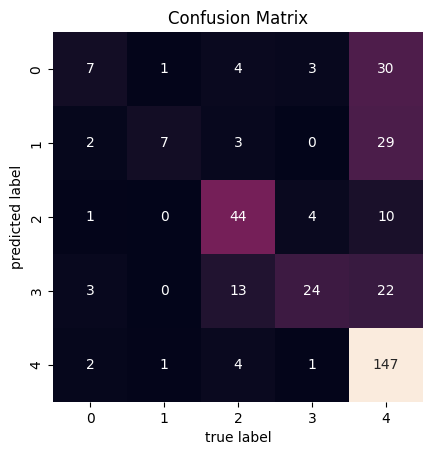

In [400]:
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [401]:
X = df[['Off.eFG %', 'Off.TO %', 'Off.OR %', 'Off.FT Rate',
       'Def.eFG %', 'Def.TO %', 'Def.OR %', 'Def.FT Rate', 'Off.FT',
       'Off.2PT FG', 'Off.3PT FG', 'Def.FT', 'Def.2PT FG', 'Def.3PT FG', 'Avg Possession Length (Offense)', 'Avg Possession Length (Defense)', 'Active Coaching Length']]
y = df['Post-Season Tournament']

class_counts = df['Post-Season Tournament'].value_counts()

total_samples = len(df)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=df['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]
    
scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    lm = LogisticRegression(class_weight=weights)
    lm.fit(X_train, y_train)

    y_pred = lm.predict(X_test)

    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
    scores['p'].append(p)
    scores['r'].append(r)
    scores['f'].append(f)
    
avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

'precision = [0.9339409  0.65066593 0.30818789 0.06200969 0.06246032]'

'recall = [0.61902716 0.56833811 0.57072631 0.16309524 0.25777778]'

'f-score = [0.74141319 0.59473788 0.38182593 0.07954331 0.09064528]'

#### Offensive Attributes

In [402]:
X = df[['Off.eFG %', 'Off.TO %', 'Off.OR %', 'Off.FT Rate',
        'Off.FT',
       'Off.2PT FG', 'Off.3PT FG',  'Avg Possession Length (Offense)',  'Active Coaching Length']]
y = df['Post-Season Tournament']

class_counts = df['Post-Season Tournament'].value_counts()

total_samples = len(df)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=df['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]
    
scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    lm = LogisticRegression(class_weight=weights)
    lm.fit(X_train, y_train)

    y_pred = lm.predict(X_test)

    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
    scores['p'].append(p)
    scores['r'].append(r)
    scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

'precision = [0.89335899 0.60333718 0.16205709 0.01445591 0.03760638]'

'recall = [0.48305379 0.53810637 0.37018519 0.07222222 0.21666667]'

'f-score = [0.62382589 0.54790198 0.22038944 0.02321429 0.06160471]'

#### Defensive Attributes

In [403]:
X = df[[       'Def.eFG %', 'Def.TO %', 'Def.OR %', 'Def.FT Rate', 
        'Def.FT', 'Def.2PT FG', 'Def.3PT FG',  'Avg Possession Length (Defense)', 'Active Coaching Length']]
y = df['Post-Season Tournament']

class_counts = df['Post-Season Tournament'].value_counts()

total_samples = len(df)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=df['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]
    
scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    lm = LogisticRegression(class_weight=weights)
    lm.fit(X_train, y_train)

    y_pred = lm.predict(X_test)

    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
    scores['p'].append(p)
    scores['r'].append(r)
    scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

'precision = [0.8809912  0.4235968  0.24286236 0.02056951 0.07933019]'

'recall = [0.48650831 0.38242267 0.47871679 0.11666667 0.35833333]'

'f-score = [0.62415736 0.38775704 0.30448275 0.03245572 0.12402374]'

#### Coaching Attribute

In [404]:
X = df[['Active Coaching Length']]
y = df['Post-Season Tournament']

class_counts = df['Post-Season Tournament'].value_counts()

total_samples = len(df)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=df['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]
    
scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    lm = LogisticRegression(class_weight=weights)
    lm.fit(X_train, y_train)

    y_pred = lm.predict(X_test)

    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
    scores['p'].append(p)
    scores['r'].append(r)
    scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: Unde

'precision = [0.24929007 0.27401951 0.02336333 0.02262938 0.00555368]'

'recall = [0.06676817 0.4249556  0.0875     0.42777778 0.175     ]'

'f-score = [0.09853957 0.31947101 0.03004667 0.04236256 0.01038443]'

### Grouped Into Two Classes

In [405]:
def transform(value):
    if value != 'March Madness':
        return 0
    return 1

binaryDF = df.copy()
binaryDF['Post-Season Tournament'] = [transform(value) for value in binaryDF['Post-Season Tournament']]

Text(0.5, 0, 'Years')

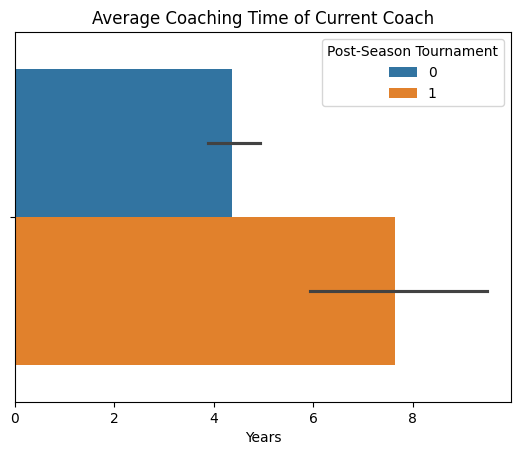

In [406]:
sns.barplot(data=binaryDF, x="Active Coaching Length", hue='Post-Season Tournament')
plt.title('Average Coaching Time of Current Coach')
plt.xlabel('Years')

Text(0, 0.5, 'Defensive field goal efficiency percentage')

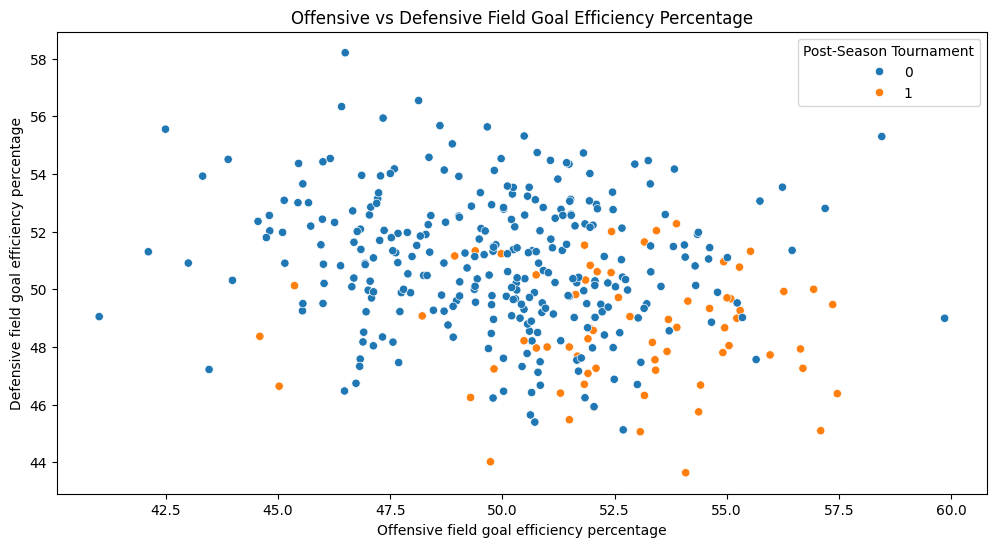

In [407]:
plt.figure(figsize=[12, 6])
sns.scatterplot(data=binaryDF, x='Off.eFG %', y='Def.eFG %', hue='Post-Season Tournament')
plt.title('Offensive vs Defensive Field Goal Efficiency Percentage')
plt.xlabel('Offensive field goal efficiency percentage')
plt.ylabel('Defensive field goal efficiency percentage')

Text(0, 0.5, 'Defensive 2 pt field goals')

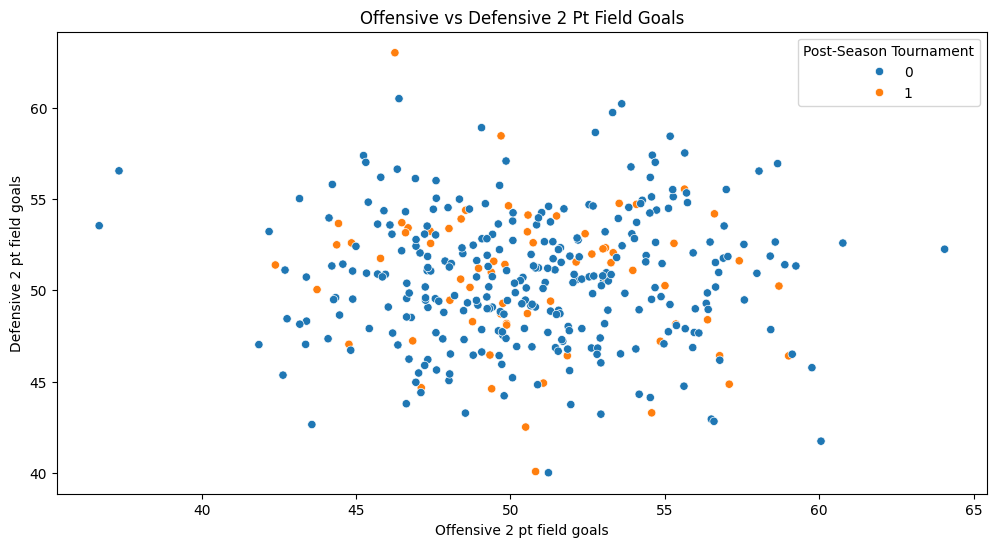

In [409]:
plt.figure(figsize=[12, 6])
sns.scatterplot(data=binaryDF, x='Off.2PT FG', y='Def.2PT FG', hue='Post-Season Tournament')
plt.title('Offensive vs Defensive 2 Pt Field Goals')
plt.xlabel('Offensive 2 pt field goals')
plt.ylabel('Defensive 2 pt field goals')

Text(0, 0.5, 'Defensive 3 pt fields')

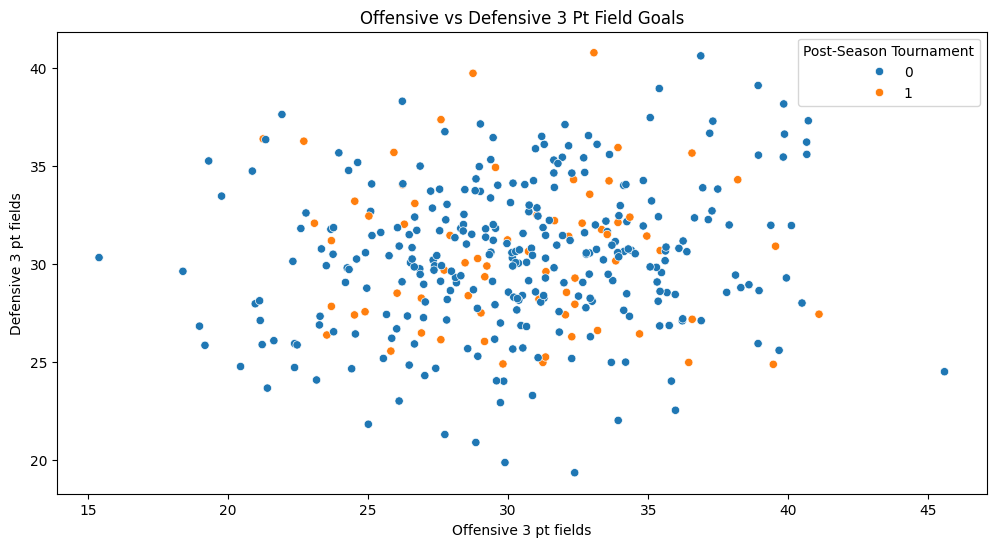

In [410]:
plt.figure(figsize=[12, 6])
sns.scatterplot(data=binaryDF, x='Off.3PT FG', y='Def.3PT FG', hue='Post-Season Tournament')
plt.title('Offensive vs Defensive 3 Pt Field Goals')
plt.xlabel('Offensive 3 pt fields')
plt.ylabel('Defensive 3 pt fields')

#### All Attributes

In [411]:
X = binaryDF[['Off.eFG %', 'Off.TO %', 'Off.OR %', 'Off.FT Rate',
       'Def.eFG %', 'Def.TO %', 'Def.OR %', 'Def.FT Rate', 'Off.FT',
       'Off.2PT FG', 'Off.3PT FG', 'Def.FT', 'Def.2PT FG', 'Def.3PT FG', 'Avg Possession Length (Offense)', 'Avg Possession Length (Defense)', 'Active Coaching Length']]
y = binaryDF['Post-Season Tournament']

class_counts = binaryDF['Post-Season Tournament'].value_counts()

total_samples = len(binaryDF)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=binaryDF['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]

lm = LogisticRegression(class_weight=weights)
lm.fit(X, y)

y_pred = lm.predict(X)

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=class_counts.index)
display(s)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([294,  68], dtype=int64)

'precision = [0.96498054 0.56190476]'

'recall = [0.84353741 0.86764706]'

'f-score = [0.90018149 0.68208092]'

Text(113.9222222222222, 0.5, 'predicted label')

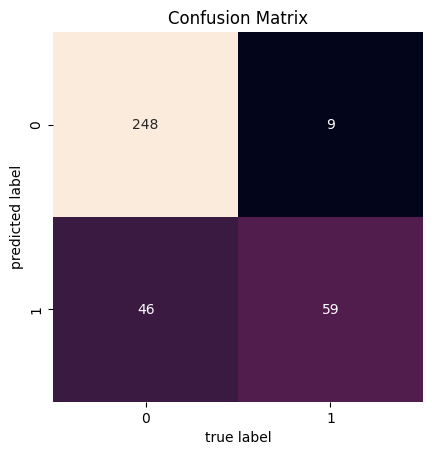

In [413]:
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [414]:
X = binaryDF[['Off.eFG %', 'Off.TO %', 'Off.OR %', 'Off.FT Rate',
       'Def.eFG %', 'Def.TO %', 'Def.OR %', 'Def.FT Rate', 'Off.FT',
       'Off.2PT FG', 'Off.3PT FG', 'Def.FT', 'Def.2PT FG', 'Def.3PT FG', 'Avg Possession Length (Offense)', 'Avg Possession Length (Defense)', 'Active Coaching Length']]
y = binaryDF['Post-Season Tournament']

class_counts = binaryDF['Post-Season Tournament'].value_counts()

total_samples = len(binaryDF)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=binaryDF['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]
    
scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    lm = LogisticRegression(class_weight=weights)
    lm.fit(X_train, y_train)

    y_pred = lm.predict(X_test)

    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
    scores['p'].append(p)
    scores['r'].append(r)
    scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

'precision = [0.95509437 0.51592897]'

'recall = [0.81942933 0.82659022]'

'f-score = [0.88082364 0.63004645]'

#### Offensive Attributes

In [415]:
X = binaryDF[['Off.eFG %', 'Off.TO %', 'Off.OR %', 'Off.FT Rate',
        'Off.FT',
       'Off.2PT FG', 'Off.3PT FG',  'Avg Possession Length (Offense)',  'Active Coaching Length']]
y = binaryDF['Post-Season Tournament']

class_counts = binaryDF['Post-Season Tournament'].value_counts()

total_samples = len(binaryDF)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=binaryDF['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]
    
scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    lm = LogisticRegression(class_weight=weights)
    lm.fit(X_train, y_train)

    y_pred = lm.predict(X_test)

    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
    scores['p'].append(p)
    scores['r'].append(r)
    scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

'precision = [0.94619219 0.48177858]'

'recall = [0.79135306 0.80914097]'

'f-score = [0.86041798 0.59632346]'

#### Defensive Attributes

In [416]:
X = binaryDF[[
       'Def.eFG %', 'Def.TO %', 'Def.OR %', 'Def.FT Rate', 
     'Def.FT', 'Def.2PT FG', 'Def.3PT FG', 'Avg Possession Length (Defense)', 'Active Coaching Length']]
y = binaryDF['Post-Season Tournament']

class_counts = binaryDF['Post-Season Tournament'].value_counts()

total_samples = len(binaryDF)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=binaryDF['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]
    
scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    lm = LogisticRegression(class_weight=weights)
    lm.fit(X_train, y_train)

    y_pred = lm.predict(X_test)

    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
    scores['p'].append(p)
    scores['r'].append(r)
    scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

'precision = [0.91458063 0.39091713]'

'recall = [0.75038716 0.69894935]'

'f-score = [0.82292115 0.49474404]'

#### Coach Attribute

In [417]:
X = binaryDF[['Active Coaching Length']]
y = binaryDF['Post-Season Tournament']

class_counts = binaryDF['Post-Season Tournament'].value_counts()

total_samples = len(binaryDF)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=binaryDF['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]
    
scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    lm = LogisticRegression(class_weight=weights)
    lm.fit(X_train, y_train)

    y_pred = lm.predict(X_test)

    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
    scores['p'].append(p)
    scores['r'].append(r)
    scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

'precision = [0.82870418 0.27012275]'

'recall = [0.74633578 0.38661337]'

'f-score = [0.78308616 0.3101095 ]'

## SVM

### All Classes

#### All Attributes

In [418]:
X = df[['Off.eFG %', 'Off.TO %', 'Off.OR %', 'Off.FT Rate',
       'Def.eFG %', 'Def.TO %', 'Def.OR %', 'Def.FT Rate', 'Off.FT',
       'Off.2PT FG', 'Off.3PT FG', 'Def.FT', 'Def.2PT FG', 'Def.3PT FG', 'Avg Possession Length (Offense)', 'Avg Possession Length (Defense)', 'Active Coaching Length']]
y = df['Post-Season Tournament']

class_counts = df['Post-Season Tournament'].value_counts()

total_samples = len(df)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=df['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]

scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    #    clf = svm.SVC(kernel='linear', class_weight=weights)
       clf = svm.SVC(kernel='poly', degree=5, class_weight=weights)#, class_weight={0:1, 1:0.2}) # try degree=2,4
    #    clf = svm.SVC(kernel='rbf', gamma=90, class_weight=weights) # try gamma=.1,1
       clf.fit(X_train.values, y_train)

       y_pred = clf.predict(X_test)
       p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
       scores['p'].append(p)
       scores['r'].append(r)
       scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warning

{'p': [array([0.89795918, 0.42105263, 0.375     , 0.        , 0.        ]), array([0.83018868, 0.45833333, 0.33333333, 0.        , 0.        ]), array([0.79166667, 0.625     , 0.07142857, 0.        , 0.5       ]), array([0.87804878, 0.60714286, 0.4       , 0.        , 0.        ]), array([0.875     , 0.55      , 0.33333333, 0.125     , 0.        ]), array([0.85714286, 0.68421053, 0.25      , 0.        , 0.        ]), array([0.85714286, 0.21428571, 0.22222222, 0.        , 0.        ]), array([0.82352941, 0.55555556, 0.36363636, 0.14285714, 0.        ]), array([0.93617021, 0.73333333, 0.28571429, 0.1       , 0.        ]), array([0.86046512, 0.59259259, 0.28571429, 0.        , 0.        ]), array([0.85 , 0.875, 0.2  , 0.2  , 0.   ]), array([0.95121951, 0.46153846, 0.1875    , 0.        , 0.        ]), array([0.88235294, 0.33333333, 0.125     , 0.        , 0.        ]), array([0.84782609, 0.40909091, 0.375     , 0.        , 0.        ]), array([0.8       , 0.47368421, 0.33333333, 0.0909090

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'precision = [0.86545212 0.4827097  0.28938363 0.06866897 0.02333333]'

'recall = [0.72080174 0.54635707 0.39705461 0.18420635 0.02333333]'

'f-score = [0.78510079 0.49876598 0.32266195 0.09095694 0.01904762]'

#### Offensive Attributes

In [419]:
X = df[['Off.eFG %', 'Off.TO %', 'Off.OR %', 'Off.FT Rate',
        'Off.FT',
       'Off.2PT FG', 'Off.3PT FG',  'Avg Possession Length (Offense)', 'Active Coaching Length']]
y = df['Post-Season Tournament']

class_counts = df['Post-Season Tournament'].value_counts()

total_samples = len(df)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=df['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]

scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    #    clf = svm.SVC(kernel='linear', class_weight=weights)
       clf = svm.SVC(kernel='poly', degree=5, class_weight=weights)#, class_weight={0:1, 1:0.2}) # try degree=2,4
    #    clf = svm.SVC(kernel='rbf', gamma=90, class_weight=weights) # try gamma=.1,1
       clf.fit(X_train.values, y_train)

       y_pred = clf.predict(X_test)
       p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
       scores['p'].append(p)
       scores['r'].append(r)
       scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warning

{'p': [array([0.86486486, 0.63157895, 0.23076923, 0.13333333, 0.        ]), array([0.93939394, 0.52380952, 0.08333333, 0.05      , 0.        ]), array([0.88372093, 0.45      , 0.33333333, 0.06666667, 0.        ]), array([0.90909091, 0.3       , 0.15789474, 0.        , 0.        ]), array([0.78378378, 0.625     , 0.09090909, 0.        , 0.        ]), array([0.88888889, 0.47619048, 0.33333333, 0.        , 0.14285714]), array([0.83783784, 0.39130435, 0.2       , 0.09090909, 0.        ]), array([0.88235294, 0.52      , 0.        , 0.        , 0.        ]), array([0.85365854, 0.53333333, 0.2       , 0.125     , 0.        ]), array([0.8974359 , 0.52941176, 0.13333333, 0.        , 0.        ]), array([0.83870968, 0.42857143, 0.5       , 0.        , 0.        ]), array([0.91666667, 0.6       , 0.21428571, 0.        , 0.        ]), array([0.88571429, 0.41666667, 0.28571429, 0.        , 0.        ]), array([0.88095238, 0.38888889, 0.33333333, 0.06666667, 0.25      ]), array([0.91666667, 0.692307

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'precision = [0.872797   0.50187324 0.19423734 0.04379118 0.07578042]'

'recall = [0.53863749 0.53987753 0.27523551 0.15531746 0.11666667]'

'f-score = [0.66136214 0.51291459 0.21514041 0.06092267 0.08539923]'

#### Defensive Attributes

In [420]:
X = df[[
       'Def.eFG %', 'Def.TO %', 'Def.OR %', 'Def.FT Rate', 
       'Def.FT', 'Def.2PT FG', 'Def.3PT FG', 'Avg Possession Length (Defense)', 'Active Coaching Length']]
y = df['Post-Season Tournament']

class_counts = df['Post-Season Tournament'].value_counts()

total_samples = len(df)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=df['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]

scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    #    clf = svm.SVC(kernel='linear', class_weight=weights)
       clf = svm.SVC(kernel='poly', degree=5, class_weight=weights)#, class_weight={0:1, 1:0.2}) # try degree=2,4
    #    clf = svm.SVC(kernel='rbf', gamma=90, class_weight=weights) # try gamma=.1,1
       clf.fit(X_train.values, y_train)

       y_pred = clf.predict(X_test)
       p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
       scores['p'].append(p)
       scores['r'].append(r)
       scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warning

{'p': [array([0.88095238, 0.5625    , 0.33333333, 0.06666667, 0.16666667]), array([0.7       , 0.42105263, 0.30769231, 0.        , 0.        ]), array([0.87878788, 0.31578947, 0.2       , 0.125     , 0.        ]), array([0.825     , 0.55      , 0.2       , 0.11111111, 0.        ]), array([0.79411765, 0.5       , 0.5       , 0.10526316, 0.        ]), array([0.77777778, 0.23809524, 0.125     , 0.22222222, 0.11111111]), array([0.81081081, 0.22222222, 0.08333333, 0.        , 0.        ]), array([0.87179487, 0.35714286, 0.09090909, 0.        , 0.        ]), array([0.8125    , 0.46153846, 0.2       , 0.1       , 0.        ]), array([0.81395349, 0.1875    , 0.33333333, 0.        , 0.        ]), array([0.81481481, 0.38888889, 0.22727273, 0.        , 0.        ]), array([0.80645161, 0.33333333, 0.08333333, 0.08333333, 0.        ]), array([0.94594595, 0.55555556, 0.30769231, 0.08333333, 0.14285714]), array([0.65714286, 0.3       , 0.2       , 0.        , 0.        ]), array([0.93103448, 0.421052

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'precision = [0.82713879 0.38481639 0.22029453 0.05063419 0.02459115]'

'recall = [0.48951026 0.42632691 0.44627937 0.16563492 0.07611111]'

'f-score = [0.6127575  0.39502862 0.27658303 0.07479117 0.03563733]'

#### Coach Attribute

In [421]:
X = df[['Active Coaching Length']]
y = df['Post-Season Tournament']

class_counts = df['Post-Season Tournament'].value_counts()

total_samples = len(df)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=df['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]

scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

       clf = svm.SVC(kernel='linear', class_weight=weights)
    #    clf = svm.SVC(kernel='poly', degree=5, class_weight=weights)#, class_weight={0:1, 1:0.2}) # try degree=2,4
    #    clf = svm.SVC(kernel='rbf', gamma=90, class_weight=weights) # try gamma=.1,1
       clf.fit(X_train.values, y_train)

       y_pred = clf.predict(X_test)
       p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
       scores['p'].append(p)
       scores['r'].append(r)
       scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precisio

{'p': [array([0. , 0.4, 0. , 0. , 0. ]), array([0.        , 0.22727273, 0.        , 0.        , 0.        ]), array([0.71428571, 0.35294118, 0.        , 0.05970149, 0.        ]), array([0.6       , 0.375     , 0.03225806, 0.        , 0.        ]), array([0.25      , 0.5       , 0.        , 0.03174603, 0.        ]), array([0.75      , 0.25      , 0.08474576, 0.        , 0.        ]), array([0.        , 0.35      , 0.        , 0.03846154, 0.05263158]), array([0.        , 0.22727273, 0.        , 0.03508772, 0.        ]), array([0.        , 0.41176471, 0.        , 0.05084746, 0.        ]), array([0.        , 0.23529412, 0.        , 0.        , 0.02702703]), array([0.61971831, 0.2       , 0.        , 0.        , 0.        ]), array([0.36363636, 0.23529412, 0.        , 0.        , 0.03174603]), array([0.        , 0.31818182, 0.        , 0.        , 0.        ]), array([0.        , 0.23076923, 0.        , 0.        , 0.01298701]), array([0.        , 0.35294118, 0.        , 0.        , 0.01351

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC wa

'precision = [0.25556848 0.32826442 0.01835022 0.01729698 0.00790372]'

'recall = [0.05195218 0.32381217 0.15464286 0.37222222 0.17222222]'

'f-score = [0.06909179 0.31608862 0.02946668 0.03300791 0.01448033]'

### Classes Grouped Into Two Classes

#### All Attributes

In [423]:
X = binaryDF[['Off.eFG %', 'Off.TO %', 'Off.OR %', 'Off.FT Rate',
       'Def.eFG %', 'Def.TO %', 'Def.OR %', 'Def.FT Rate', 'Off.FT',
       'Off.2PT FG', 'Off.3PT FG', 'Def.FT', 'Def.2PT FG', 'Def.3PT FG', 'Avg Possession Length (Offense)', 'Avg Possession Length (Defense)', 'Active Coaching Length']]
y = binaryDF['Post-Season Tournament']

class_counts = binaryDF['Post-Season Tournament'].value_counts()

total_samples = len(binaryDF)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=binaryDF['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]

scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    #    clf = svm.SVC(kernel='linear', class_weight=weights)
       clf = svm.SVC(kernel='poly', degree=2, class_weight=weights)#, class_weight={0:1, 1:0.2}) # try degree=2,4
    #    clf = svm.SVC(kernel='rbf', gamma=90, class_weight=weights) # try gamma=.1,1
       clf.fit(X_train.values, y_train)

       y_pred = clf.predict(X_test)
       p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
       scores['p'].append(p)
       scores['r'].append(r)
       scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warning

'precision = [0.95136666 0.51957085]'

'recall = [0.81799834 0.82408541]'

'f-score = [0.87861909 0.63125005]'

#### Offensive Attributes

In [424]:
X = binaryDF[['Off.eFG %', 'Off.TO %', 'Off.OR %', 'Off.FT Rate',
        'Off.FT',
       'Off.2PT FG', 'Off.3PT FG',  'Avg Possession Length (Offense)',  'Active Coaching Length']]
y = binaryDF['Post-Season Tournament']

class_counts = binaryDF['Post-Season Tournament'].value_counts()

total_samples = len(binaryDF)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=binaryDF['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]

scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    #    clf = svm.SVC(kernel='linear', class_weight=weights)
       clf = svm.SVC(kernel='poly', degree=2, class_weight=weights)#, class_weight={0:1, 1:0.2}) # try degree=2,4
    #    clf = svm.SVC(kernel='rbf', gamma=90, class_weight=weights) # try gamma=.1,1
       clf.fit(X_train.values, y_train)

       y_pred = clf.predict(X_test)
       p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
       scores['p'].append(p)
       scores['r'].append(r)
       scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warning

'precision = [0.95354188 0.46008247]'

'recall = [0.78315004 0.82917498]'

'f-score = [0.85894212 0.58563062]'

#### Defensive Attributes

In [425]:
X = binaryDF[[
       'Def.eFG %', 'Def.TO %', 'Def.OR %', 'Def.FT Rate', 
        'Def.FT', 'Def.2PT FG', 'Def.3PT FG',  'Avg Possession Length (Defense)', 'Active Coaching Length']]
y = binaryDF['Post-Season Tournament']

class_counts = binaryDF['Post-Season Tournament'].value_counts()

total_samples = len(binaryDF)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=binaryDF['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]

scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    #    clf = svm.SVC(kernel='linear', class_weight=weights)
       clf = svm.SVC(kernel='poly', degree=2, class_weight=weights)#, class_weight={0:1, 1:0.2}) # try degree=2,4
    #    clf = svm.SVC(kernel='rbf', gamma=90, class_weight=weights) # try gamma=.1,1
       clf.fit(X_train.values, y_train)

       y_pred = clf.predict(X_test)
       p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
       scores['p'].append(p)
       scores['r'].append(r)
       scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warning

'precision = [0.91842581 0.40881579]'

'recall = [0.75161585 0.71677766]'

'f-score = [0.8239689  0.50817289]'

#### Coach Attribute

In [426]:
X = binaryDF[['Active Coaching Length']]
y = binaryDF['Post-Season Tournament']

class_counts = binaryDF['Post-Season Tournament'].value_counts()

total_samples = len(binaryDF)

class_weights = compute_class_weight(class_weight='balanced', classes=class_counts.index.to_numpy(), y=binaryDF['Post-Season Tournament'])

weights = {}
for index, tourney in enumerate(class_counts.index):
    weights[tourney] = class_weights[index]

scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    #    clf = svm.SVC(kernel='linear', class_weight=weights)
       clf = svm.SVC(kernel='poly', degree=2, class_weight=weights)#, class_weight={0:1, 1:0.2}) # try degree=2,4
    #    clf = svm.SVC(kernel='rbf', gamma=90, class_weight=weights) # try gamma=.1,1
       clf.fit(X_train.values, y_train)

       y_pred = clf.predict(X_test)
       p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_counts.index)
       scores['p'].append(p)
       scores['r'].append(r)
       scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warning

'precision = [0.8309921  0.43988511]'

'recall = [0.92237948 0.197474  ]'

'f-score = [0.8726456  0.24833728]'